# Brain Cancer Survival Estimation Pediction


[data link](https://wiki.cancerimagingarchive.net/pages/viewpage.action?pageId=70225642#70225642c94d520b7b5f42e7925602d723412459)

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Importing Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


In [4]:
df = pd.read_csv('./UPENN-GBM_clinical_info_v1.0.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          671 non-null    object 
 1   Gender                      671 non-null    object 
 2   Age_at_scan_years           671 non-null    float64
 3   Survival_from_surgery_days  671 non-null    object 
 4   IDH1                        671 non-null    object 
 5   MGMT                        671 non-null    object 
 6   KPS                         671 non-null    object 
 7   GTR_over90percent           671 non-null    object 
 8   Time_since_baseline_preop   671 non-null    object 
 9   PsP_TP_score                60 non-null     float64
dtypes: float64(2), object(8)
memory usage: 52.5+ KB


In [6]:
# Dropping Redundant Columns
new_df = df.drop(['PsP_TP_score','GTR_over90percent','Time_since_baseline_preop','IDH1','MGMT','KPS'],axis=1)

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          671 non-null    object 
 1   Gender                      671 non-null    object 
 2   Age_at_scan_years           671 non-null    float64
 3   Survival_from_surgery_days  671 non-null    object 
dtypes: float64(1), object(3)
memory usage: 21.1+ KB


In [44]:
# Converting String to Integer Values 
new_df['Survival_from_surgery_days'] = new_df['Survival_from_surgery_days'].astype(int)

new_df['Age_at_scan_years'] = new_df['Age_at_scan_years'].round().astype(int)

new_df.reset_index()

,index,ID,Gender,Age_at_scan_years,Survival_from_surgery_days,SubjectID,DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation,DSC_ap-rCBV_ED_Intensity_Energy,DSC_ap-rCBV_ED_Intensity_InterQuartileRange,DSC_ap-rCBV_ED_Intensity_Kurtosis,...,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,T2_NC_NGTDM_Busyness,T2_NC_NGTDM_Coarsness,T2_NC_NGTDM_Complexity,T2_NC_NGTDM_Contrast,T2_NC_NGTDM_Strength,T2_NC_LBP_Radius-1_Bins-16_LBP
0,0,UPENN-GBM-00002_11,0,61,291,UPENN-GBM-00002_11,1.006469,292489195.0,29.0,8.792163,...,21.253112,202.073306,0.279493,26157.184900,116.828033,0.000044,1093.122177,0.269478,0.005695,141135.633800
1,1,UPENN-GBM-00006_11,1,53,626,UPENN-GBM-00006_11,1.049003,81971150.0,24.0,10.115593,...,35.092664,92.150579,0.355794,44866.331180,68.546100,0.000070,1258.877860,0.277571,0.009453,86559.097990
2,2,UPENN-GBM-00008_11,0,55,469,UPENN-GBM-00008_11,0.566691,56110059.0,18.0,9.622088,...,5.712000,34.504000,0.276032,179.197056,4.902816,0.001293,933.303418,0.522065,0.144847,6752.137494
3,4,UPENN-GBM-00011_11,0,40,798,UPENN-GBM-00011_11,1.059457,23663159.0,9.0,30.216044,...,20.692456,143.235977,0.277052,18344.889940,69.804583,0.000083,1172.071443,0.700804,0.009554,89650.100100
4,7,UPENN-GBM-00014_11,1,68,272,UPENN-GBM-00014_11,1.095544,46428936.0,12.0,26.155334,...,20.325773,301.851546,0.311187,29120.559850,146.619015,0.000078,718.637813,0.444185,0.007643,178568.029800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,296,UPENN-GBM-00398_11,1,69,342,UPENN-GBM-00398_11,1.008293,75910621.0,16.0,13.323531,...,17.273952,159.392216,0.238611,5967.588124,75.521514,0.000136,744.447337,0.813383,0.011441,106996.893100
114,315,UPENN-GBM-00418_11,0,50,1410,UPENN-GBM-00418_11,0.383445,178419876.0,46.0,3.670452,...,13.888000,51.896000,0.207584,2391.835456,21.758822,0.000336,1037.114205,1.037046,0.034182,33746.435880
115,321,UPENN-GBM-00428_11,1,65,374,UPENN-GBM-00428_11,0.929962,17686850.0,10.0,24.908131,...,2.456140,21.526316,0.377655,10.002462,0.937305,0.006855,956.263376,0.847158,0.801394,1626.364111
116,327,UPENN-GBM-00437_11,0,53,82,UPENN-GBM-00437_11,1.080687,42394307.0,30.0,6.365185,...,16.410237,361.678380,0.276301,31584.550580,154.234790,0.000031,1222.522480,0.535675,0.004446,217269.741300


In [ ]:
new_df.head()

,ID,Gender,Age_at_scan_years,Survival_from_surgery_days
1,UPENN-GBM-00002_11,F,61,291
5,UPENN-GBM-00006_11,M,53,626
7,UPENN-GBM-00008_11,F,55,469
8,UPENN-GBM-00009_11,M,69,561
10,UPENN-GBM-00011_11,F,40,798


In [ ]:
new_df.describe()

,Age_at_scan_years,Survival_from_surgery_days
count,452.000000,452.000000
mean,63.699115,422.165929
std,11.964200,355.260164
min,21.000000,3.000000
25%,56.000000,157.750000
50%,64.000000,366.000000
75%,72.000000,554.000000
max,88.000000,2207.000000


In [ ]:
# Saving the csv File
# new_df.to_csv('clinical-modifed.csv',index=False)

## Feature Extraction

In [39]:
clinical_data_df = pd.read_csv('./clinical-modifed.csv')
cd_df = clinical_data_df.copy()

In [40]:
import os

In [41]:
# os.listdir('./data/')
feature= pd.DataFrame()
csv_files = os.listdir('./data')

for file in csv_files:
    df_temp = pd.read_csv('./data/'+file)
    cd_df = pd.merge(cd_df,df_temp,left_on="ID",right_on="SubjectID",how="left",suffixes=('', '_drop'))
        


In [42]:
cd_df.drop([col for col in cd_df.columns if 'drop' in col], axis=1, inplace=True)

In [43]:
cd_df.columns

Index(['ID', 'Gender', 'Age_at_scan_years', 'Survival_from_surgery_days',
       'SubjectID', 'DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation',
       'DSC_ap-rCBV_ED_Intensity_Energy',
       'DSC_ap-rCBV_ED_Intensity_InterQuartileRange',
       'DSC_ap-rCBV_ED_Intensity_Kurtosis', 'DSC_ap-rCBV_ED_Intensity_Maximum',
       ...
       'T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean',
       'T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity',
       'T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized',
       'T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance', 'T2_NC_NGTDM_Busyness',
       'T2_NC_NGTDM_Coarsness', 'T2_NC_NGTDM_Complexity',
       'T2_NC_NGTDM_Contrast', 'T2_NC_NGTDM_Strength',
       'T2_NC_LBP_Radius-1_Bins-16_LBP'],
      dtype='object', length=4757)

In [ ]:
#cd_df.to_csv('training-data.csv',index=False)

In [16]:
df = pd.read_csv('./training-data.csv', low_memory=False)

In [17]:
new_df = df.dropna()
new_df.describe()

,Age_at_scan_years,Survival_from_surgery_days,DSC_ap-rCBV_ED_Intensity_CoefficientOfVariation,DSC_ap-rCBV_ED_Intensity_Energy,DSC_ap-rCBV_ED_Intensity_InterQuartileRange,DSC_ap-rCBV_ED_Intensity_Kurtosis,DSC_ap-rCBV_ED_Intensity_Maximum,DSC_ap-rCBV_ED_Intensity_Mean,DSC_ap-rCBV_ED_Intensity_MeanAbsoluteDeviation,DSC_ap-rCBV_ED_Intensity_Median,...,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeMean,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNonUniformity,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeNoneUniformityNormalized,T2_NC_GLSZM_Bins-16_Radius-1_ZoneSizeVariance,T2_NC_NGTDM_Busyness,T2_NC_NGTDM_Coarsness,T2_NC_NGTDM_Complexity,T2_NC_NGTDM_Contrast,T2_NC_NGTDM_Strength,T2_NC_LBP_Radius-1_Bins-16_LBP
count,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,...,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,61.398305,481.067797,0.839961,6.531428e+07,23.720339,11.717749,228.601695,30.909500,6.074547e-13,23.881356,...,17.478734,151.734460,0.273270,27808.439843,84.036280,0.000822,1029.692432,0.621053,0.088802,102727.858049
std,12.430415,408.719236,0.204523,5.158566e+07,12.074474,6.579110,31.253346,14.516671,3.536699e-12,13.943212,...,10.999177,143.127550,0.051019,56382.587789,104.802790,0.002437,324.244530,0.376285,0.237433,126829.309293
min,22.000000,12.000000,0.383445,5.305319e+06,7.000000,2.973199,108.000000,11.933020,-9.771044e-12,0.000000,...,1.758621,7.774194,0.151855,0.941736,0.645038,0.000010,577.798506,0.096414,0.001178,653.769380
25%,54.000000,208.250000,0.682896,2.648920e+07,15.000000,7.195066,212.000000,20.842317,-6.271516e-13,14.000000,...,8.217772,58.286422,0.235387,1370.045817,18.536621,0.000053,847.356917,0.355515,0.007150,25132.769310
50%,61.000000,383.500000,0.855030,5.096723e+07,20.000000,10.057632,237.000000,26.761068,7.260399e-14,19.000000,...,16.218972,107.354817,0.269263,6307.069041,55.669503,0.000134,952.259949,0.515595,0.016018,63629.804780
75%,69.000000,582.250000,0.990443,8.405728e+07,30.000000,14.176321,255.000000,39.607503,1.170711e-12,32.000000,...,23.557361,201.904979,0.308480,31363.118182,114.290911,0.000392,1111.327771,0.769964,0.049986,133162.887425
max,87.000000,2207.000000,1.603620,2.924892e+08,67.000000,38.669859,255.000000,92.803610,2.020821e-11,86.000000,...,45.943787,835.873753,0.423002,466521.423800,678.392010,0.016765,2327.248433,2.046871,1.826919,833166.306200


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
new_df['Gender'].value_counts()

M    71
F    47
Name: Gender, dtype: int64

In [20]:
new_df['Gender'] = le.fit_transform(new_df['Gender'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9832\934390276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Gender'] = le.fit_transform(new_df['Gender'])


In [21]:
df1 = new_df['Survival_from_surgery_days'][new_df['Gender']==1]

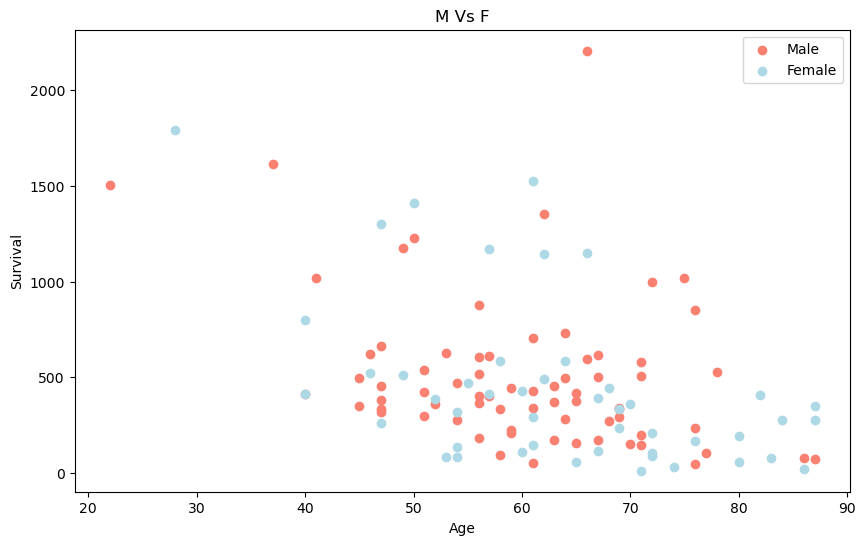

In [22]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter( new_df['Age_at_scan_years'][new_df['Gender']==1],
            new_df['Survival_from_surgery_days'][new_df['Gender']==1], 
            
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(new_df['Age_at_scan_years'][new_df['Gender']==0],
    new_df['Survival_from_surgery_days'][new_df['Gender']==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("M Vs F")
plt.ylabel("Survival")
plt.legend(["Male", "Female"])
plt.xlabel("Age");

In [23]:
corrM = new_df.corr()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9832\365703186.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = new_df.corr()


In [24]:
corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323]
feature_columns = corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323].keys()
# len(corrM['Survival_from_surgery_days'][lambda x: abs(x)>0.323])

In [25]:
filtered_df = new_df[feature_columns]

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 329
Data columns (total 51 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Age_at_scan_years                                                   118 non-null    int64  
 1   Survival_from_surgery_days                                          118 non-null    int64  
 2   DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_Bin-11_Probability         118 non-null    float64
 3   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-13_Frequency                118 non-null    float64
 4   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-14_Frequency                118 non-null    float64
 5   DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-15_Frequency                118 non-null    float64
 6   DTI_AD_ET_Intensity_InterQuartileRange                              118 non-null    float64
 7   DTI_AD_NC_Histogr

In [27]:
#filtered_df.to_csv('train.csv',index=False)

In [28]:
df = pd.read_csv('train.csv')

In [30]:
df.head()

,Age_at_scan_years,Survival_from_surgery_days,DSC_ap-rCBV_ED_Histogram_Bins-16_Bins-16_Bin-11_Probability,DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-13_Frequency,DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-14_Frequency,DSC_PH_ED_Histogram_Bins-16_Bins-16_Bin-15_Frequency,DTI_AD_ET_Intensity_InterQuartileRange,DTI_AD_NC_Histogram_Bins-16_Bins-16_Bin-10_Probability,DTI_AD_NC_Histogram_Bins-16_Bins-16_Bin-11_Probability,DTI_AD_NC_Histogram_Bins-16_Bins-16_Bin-12_Probability,...,FLAIR_NC_GLRLM_Bins-16_Radius-1_LongRunHighGreyLevelEmphasis,FLAIR_NC_GLRLM_Bins-16_Radius-1_ShortRunEmphasis,FLAIR_NC_GLSZM_Bins-16_Radius-1_GreyLevelVariance,FLAIR_NC_NGTDM_Contrast,T1GD_ET_Intensity_Maximum,T1_ET_GLRLM_Bins-16_Radius-1_ShortRunEmphasis,T1_NC_GLRLM_Bins-16_Radius-1_LongRunEmphasis,T1_NC_GLRLM_Bins-16_Radius-1_ShortRunEmphasis,T2_NC_GLRLM_Bins-16_Radius-1_LongRunEmphasis,T2_NC_GLRLM_Bins-16_Radius-1_ShortRunEmphasis
0,61,291,0.001406,71.0,22.0,10.0,28.0,0.052519,0.087401,0.127424,...,96.940634,0.980079,7.858215,0.498793,202.0,0.992906,1.030277,0.992650,1.068664,0.983939
1,53,626,0.001074,72.0,48.0,104.0,16.0,0.095170,0.089889,0.074486,...,47.620488,0.937439,8.340937,0.174021,181.0,0.992546,1.101141,0.977954,1.368182,0.928176
2,55,469,0.000848,111.0,32.0,11.0,10.0,0.040616,0.044818,0.014006,...,76.952450,0.974797,10.008810,0.479608,159.0,0.976954,1.132020,0.974984,1.182262,0.963164
3,40,798,0.000130,20.0,5.0,5.0,50.0,0.057394,0.050009,0.038418,...,84.438277,0.974369,8.477602,0.326496,240.0,0.980654,1.151729,0.967070,1.243643,0.951689
4,68,272,0.000191,36.0,24.0,23.0,33.0,0.030381,0.023686,0.023737,...,96.316006,0.983609,8.264020,0.340052,250.0,0.995410,1.020192,0.995060,1.116171,0.974976


In [31]:
y = df['Survival_from_surgery_days']
X = df.drop("Survival_from_surgery_days",axis=1)

In [32]:
X = scaler.fit_transform(X)

In [33]:
X.shape, y.shape

((118, 50), (118,))

In [34]:
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_t.shape, y_t.shape,X_test.shape,y_test.shape

((100, 50), (100,), (18, 50), (18,))

In [35]:
X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=42)
X_train.shape, y_train.shape,X_val.shape,y_val.shape

((85, 50), (85,), (15, 50), (15,))

In [36]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [37]:
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import BayesianRidge
# from sklearn.linear_model import Lasso
# from sklearn.svm import SVR
# from sklearn.kernel_ridge import KernelRidge

# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomForestRegressor
# Put models in a dictionary
models = {"LinearRegression": LinearRegression(),
          "BayesianRidge": BayesianRidge(), 
          "Lasso": Lasso(), 
          "SVR-linear": SVR(kernel="linear"),
          "SVR-rbf": SVR(kernel="rbf"),
          "KernelRidge": KernelRidge(), 
          "GradientBoostingRegressor": GradientBoostingRegressor(), 
          "Random Forest": RandomForestRegressor()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = show_scores(model)
    return model_scores

In [38]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_val,
                             y_train=y_train,
                             y_test=y_val)

model_scores

{'LinearRegression': {'Training MAE': 135.1836938594719,
  'Valid MAE': 446.81764315967996,
  'Training R^2': 0.7729198917570713,
  'Valid R^2': -0.7561096248992145},
 'BayesianRidge': {'Training MAE': 180.31500112786276,
  'Valid MAE': 284.6088648424975,
  'Training R^2': 0.6094515491872732,
  'Valid R^2': 0.06527503412601743},
 'Lasso': {'Training MAE': 173.61893089690213,
  'Valid MAE': 297.25302220894537,
  'Training R^2': 0.6591267378960413,
  'Valid R^2': 0.00941389062079867},
 'SVR-linear': {'Training MAE': 243.11184518309233,
  'Valid MAE': 308.9378147338396,
  'Training R^2': 0.019758479777977844,
  'Valid R^2': -0.19759869346541659},
 'SVR-rbf': {'Training MAE': 251.0892472681856,
  'Valid MAE': 312.97722547262595,
  'Training R^2': -0.024558484888111298,
  'Valid R^2': -0.2338328262832159},
 'KernelRidge': {'Training MAE': 180.0783635088705,
  'Valid MAE': 290.51126977540684,
  'Training R^2': 0.6175540260480579,
  'Valid R^2': 0.028313986944274006},
 'GradientBoostingRegres

We select the Random Forest Algorithm

### Test Results

In [ ]:
rf = RandomForestRegressor(n_estimators=15,max_depth=5)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=15)

In [ ]:
preds = rf.predict(X_test)

In [ ]:
print("Mean Absolute Error", mean_absolute_error(y_test, preds))

Mean Absolute Error 255.03039396592828
